<a href="https://colab.research.google.com/github/ScriptsRemote/SCRIPTSREMOTE/blob/main/00_GeoBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##Instalação da Biblioteca
!pip install geobr geopandas==0.10.0 rtree pyproj mapclassify

In [ ]:
##Import a biblioteca
import geobr
import rtree
import folium
import geopandas as gpd
import matplotlib.pyplot as plt
import mapclassify

In [ ]:
##Verificar a lista dos dados do geobr
geobr.list_geobr()

In [ ]:
##Análise de UCs nos municípios 
muni = geobr.read_municipality(year=2020)
muni

In [ ]:
##Filtrando a base por municipio
gdf_muni = muni[muni.name_muni=='Porto Alegre']
gdf_muni

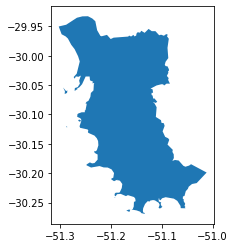

In [ ]:
##plot o shape
gdf_muni.plot()

In [ ]:
##Definindo o sistema de projeção
gdf_muni.crs = "EPSG:4326"
gdf_muni.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
##Unidades de conservação 
uc_gdf= geobr.read_conservation_units(date=201909, simplified=True, verbose=False)
uc_gdf.head()

,code_conservation_unit,name_conservation_unit,id_wcm,category,group,government_level,creation_year,gid7,quality,legislation,dt_ultim10,code_u111,name_organization,date,geometry
0,2350,RESERVA PARTICULAR DO PATRIMÔNIO NATURAL BUGIO...,None,Reserva Particular do Patrimônio Natural,US,estadual,2010,6101,Aproximado (O poligono representa uma estimati...,Outros nº 74-S de 22/02/2010,31/08/2012,0000.32.2350,Instituto Estadual de Meio Ambiente e Recursos...,201909.0,"MULTIPOLYGON (((-40.96875 -20.06128, -40.96906..."
1,3787,AREA DE PROTECAO AMBIENTAL DA BACIA DO CORREGO...,None,Área de Proteção Ambiental,US,municipal,2018,15289,Correto (O poligono corresponde ao memorial de...,Decreto nº 051/2018 de 20/09/2018,20/09/2018,1480.52.3787,Secretaria Municipal de Meio Ambiente de Nova ...,201909.0,"MULTIPOLYGON (((-48.25389 -18.04416, -48.25640..."
2,3445,RESERVA PARTICULAR DO PATRIMÔNIO NATURAL PILAR,None,Reserva Particular do Patrimônio Natural,US,estadual,2013,13500,Correto (O poligono corresponde ao memorial de...,Portaria nº 466 de 27/06/2013,10/07/2017,0000.33.3445,Instituto Estadual do Ambiente do Rio de Janeiro,201909.0,"MULTIPOLYGON (((-42.79637 -22.86341, -42.79632..."
3,145,PARQUE NACIONAL DA SERRA DA CAPIVARA,64,Parque,PI,federal,1979,6506,Aproximado (O poligono representa uma estimati...,Decreto nº 83548 de 05/06/1979,27/09/2007,0000.00.0145,Instituto Chico Mendes de Conservação da Biodi...,201909.0,"MULTIPOLYGON (((-42.57484 -8.57399, -42.57355 ..."
4,1754,FLORESTA ESTADUAL DO ARAGUAIA,None,Floresta,US,estadual,2002,2983,Correto (O poligono corresponde ao memorial de...,Decreto nº 5.630 de 07/08/2002,06/08/2009,0000.52.1754,Secretaria Estadual do Meio Ambiente e dos Rec...,201909.0,"MULTIPOLYGON (((-50.58059 -13.21449, -50.57208..."


In [ ]:
uc_gdf.crs = "EPSG:4326"
uc_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
##Conferindo os sistemas 
uc_gdf.crs==gdf_muni.crs

True

In [ ]:
##Filtrando os dados de POA
uc_gdf_poa = gpd.sjoin(uc_gdf,gdf_muni)
uc_gdf_poa.head()

,code_conservation_unit,name_conservation_unit,id_wcm,category,group,government_level,creation_year,gid7,quality,legislation,...,date,geometry,index_right,code_muni,name_muni,code_state,abbrev_state,name_state,code_region,name_region
283,1987,ÁREA DE PROTEçãO AMBIENTAL ESTADUAL DELTA DO J...,None,Área de Proteção Ambiental,US,estadual,2005,12758,Correto (O poligono corresponde ao memorial de...,Lei ordinária nº 12371 de 14/11/2005,...,201909.0,"MULTIPOLYGON (((-51.41519 -29.99295, -51.42657...",4931,4314902.0,Porto Alegre,43.0,RS,Rio Grande do Sul,4.0,Sul
1110,2000,PARQUE ESTADUAL DO DELTA DO JACUí,None,Parque,PI,estadual,1976,15176,Aproximado (O poligono representa uma estimati...,Decreto nº 24385 de 30/01/1976,...,201909.0,"MULTIPOLYGON (((-51.23399 -29.99172, -51.22767...",4931,4314902.0,Porto Alegre,43.0,RS,Rio Grande do Sul,4.0,Sul
1418,3400,PARQUE NATURAL MUNICIPAL SAINT HILAIRE,None,Parque,PI,municipal,2015,13706,Aproximado (O poligono representa uma estimati...,Decreto nº 051/2015 de 15/06/2015,...,201909.0,"MULTIPOLYGON (((-51.10433 -30.08076, -51.10144...",4931,4314902.0,Porto Alegre,43.0,RS,Rio Grande do Sul,4.0,Sul
1615,2195,RESERVA PARTICULAR DO PATRIMÔNIO NATURAL RINCÃ...,None,Reserva Particular do Patrimônio Natural,US,federal,2010,10081,Correto (O poligono corresponde ao memorial de...,Portaria nº 52 de 13/07/2010,...,201909.0,"MULTIPOLYGON (((-51.10153 -30.17197, -51.09979...",4931,4314902.0,Porto Alegre,43.0,RS,Rio Grande do Sul,4.0,Sul


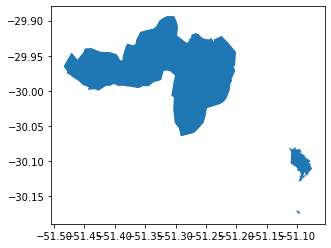

In [ ]:
uc_gdf_poa.plot()

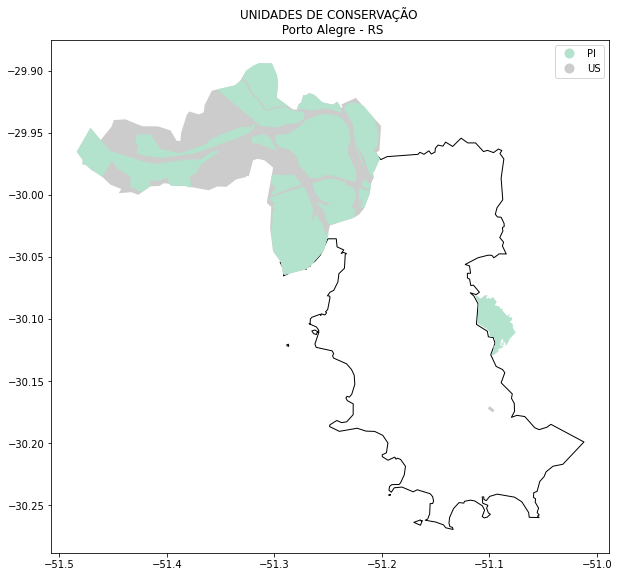

In [ ]:
##Plotando as bases
fig, ax = plt.subplots(figsize = (10,10)) 
base = gdf_muni.plot(ax=ax, color='white', edgecolor='black')
uc_gdf_poa.plot(ax=base, column='group',legend=True,  cmap='Pastel2')
ax.set_title("UNIDADES DE CONSERVAÇÃO \n Porto Alegre - RS")
plt.show()

In [ ]:
##PLot interativo
import folium


##pltar o município
m = gdf_muni.explore(
     color="gray", # definir a cor 
     tooltip="name_muni", # mostra a coluna "nome" na dica de ferramenta
     tooltip_kwds=dict(labels=False),# não mostra o rótulo da coluna na dica de ferramenta
     name="Porto Alegre" # name of the layer in the map
)

uc_gdf_poa.explore(
     m= m,
     column="government_level",  # faz coropleth baseado na coluna
     scheme="naturalbreaks", # usa o esquema de quebras naturais do mapclassify
     cmap="Spectral", # use "Set1" matplotlib colormap
     style_kwds=dict(color="black") ,
     legend=True, #mostrar legenda
     k=200, # use caixas
     legend_kwds=dict(colorbar=False), # não use barra de cores
     name="UCs" # nome da camada no mapa
)



folium.TileLayer('Stamen Toner', control=True).add_to(m)  # use folium para adicionar ladrilhos alternativos
folium.LayerControl().add_to(m)  # use folium para adicionar controle de camada

m 

In [ ]:
m.save(outfile= "test.html")